# Exploratory Data Analysis (EDA) on EEG authentication dataset for KN Neuron

### Objectives of this EDA are:
* Finding the main factors influencing Flag column which indicates wheather a user has seen a particular object or not.
* Finding fluctations and outliers
* Finding correlation between particular columns

The dataset provides information about user's `brainwaves` measured in microvolts per herz:
* Alpha
* Beta
* Gamma
* Theta
* Delta

It also gives us information about few `non-wave` parameters which are:
* Attention
* Meditation
* Blink Strength



All data was collected on MindWave Mobile 2 Headset
http://neurosky.com/biosensors/eeg-sensor/

---


It's documentation can be found here:https://developer.neurosky.com/docs/doku.php?id=mindwave

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install datatile
from datatile.summary.df import DataFrameSummary

Defaulting to user installation because normal site-packages is not writeable


## 1. Extraction and displaying the information about the data.
#### I also look for missing records and radical values in EEG Dataset


In [10]:
eeg_authentication = pd.read_csv("./autentykacja_eeg.csv", delimiter=";")
eeg_authentication.head()

Delta   Theta  Alpha_low  Alpha_high  Beta_low  Beta_high  Gamma_low  \
0  785389  114375      57106       37625     24464      17104      15846   
1  386949   80792      23506       22118      9566       7147       5392   
2   21453   14085       4756        5062      2176       2117       2867   
3  322637   56936      17810       25793     15870       8050       3621   
4   19412   12985       6416        6131      7126       7419       2677   

   Gamma_high  Attention  Meditation  BlinkStrength  Flag  
0        8024         45          91             15     1  
1        1697          8          42              6     0  
2         862         48          66              9     1  
3        2100         25          69              8     0  
4        1884         80          53             -1     1

In [11]:
eeg_authentication.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5244 entries, 0 to 5243
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Delta          5244 non-null   int64
 1   Theta          5244 non-null   int64
 2   Alpha_low      5244 non-null   int64
 3   Alpha_high     5244 non-null   int64
 4   Beta_low       5244 non-null   int64
 5   Beta_high      5244 non-null   int64
 6   Gamma_low      5244 non-null   int64
 7   Gamma_high     5244 non-null   int64
 8   Attention      5244 non-null   int64
 9   Meditation     5244 non-null   int64
 10  BlinkStrength  5244 non-null   int64
 11  Flag           5244 non-null   int64
dtypes: int64(12)
memory usage: 491.8 KB


In [12]:
eeg_authentication.describe().round(2)


Delta      Theta  Alpha_low  Alpha_high   Beta_low  Beta_high  \
count     5244.00    5244.00    5244.00     5244.00    5244.00    5244.00   
mean    309083.22   63344.77   15912.48    13478.05   10837.56    8553.93   
std     309588.62   65368.31   16146.45    12358.80   10751.97    8084.04   
min       4584.00    4307.00    1417.00     1223.00    1104.00    1181.00   
25%      74011.25   24484.25    6686.00     6461.75    5439.00    4510.00   
50%     193335.00   40572.00   10867.00     9740.00    8004.00    6598.00   
75%     465552.50   79836.00   18803.00    16006.75   12370.25    9852.00   
max    1840855.00  690442.00  168356.00   149180.00  167349.00  173909.00   

       Gamma_low  Gamma_high  Attention  Meditation  BlinkStrength     Flag  
count    5244.00     5244.00    5244.00     5244.00        5244.00  5244.00  
mean     6003.36     2987.53      51.65       58.63          11.55     0.60  
std      5821.81     2820.33      16.51       15.03          14.78     0.49  
min       558.00      251.00       1.00        1.00          -1.00     0.00  
25%      2676.75     1402.00      40.00       49.00          -1.00     0.00  
50%      4307.00     2160.00      52.00       59.00           8.00     1.00  
75%      7239.75     3526.00      63.00       69.00          18.00     1.00  
max     66565.00    27786.00     100.00       99.00         100.00     1.00

In [13]:
eeg_authentication_summary = DataFrameSummary(eeg_authentication)

In [14]:
eeg_authentication_summary.columns_types

/home/grzesiek/.local/lib/python3.10/site-packages/traceml/processors/df_processors.py:151: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  return pd.value_counts(columns_stats.loc["types"])


types
numeric    11
bool        1
Name: count, dtype: int64

In [15]:
eeg_authentication_summary.columns_stats

Delta    Theta Alpha_low Alpha_high Beta_low Beta_high  \
counts           5244     5244      5244       5244     5244      5244   
uniques          5219     5091      4735       4622     4498      4293   
missing             0        0         0          0        0         0   
missing_perc       0%       0%        0%         0%       0%        0%   
types         numeric  numeric   numeric    numeric  numeric   numeric   

             Gamma_low Gamma_high Attention Meditation BlinkStrength  Flag  
counts            5244       5244      5244       5244          5244  5244  
uniques           4101       3320        99         96            84     2  
missing              0          0         0          0             0     0  
missing_perc        0%         0%        0%         0%            0%    0%  
types          numeric    numeric   numeric    numeric       numeric  bool

## 2. Visualization!
### Since bare numbers don't give much information that I can understand and use then, a plot will be in need

In [16]:
def line_plot(columns, title: str, xlabel: str, ylabel: str, figsize=(15,10)):
    plt.figure(figsize=figsize)
    # print(columns)
    for column in columns:
        plt.plot(eeg_authentication[column], label=column)

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(bbox_to_anchor=(1.05, 1))
    plt.show()

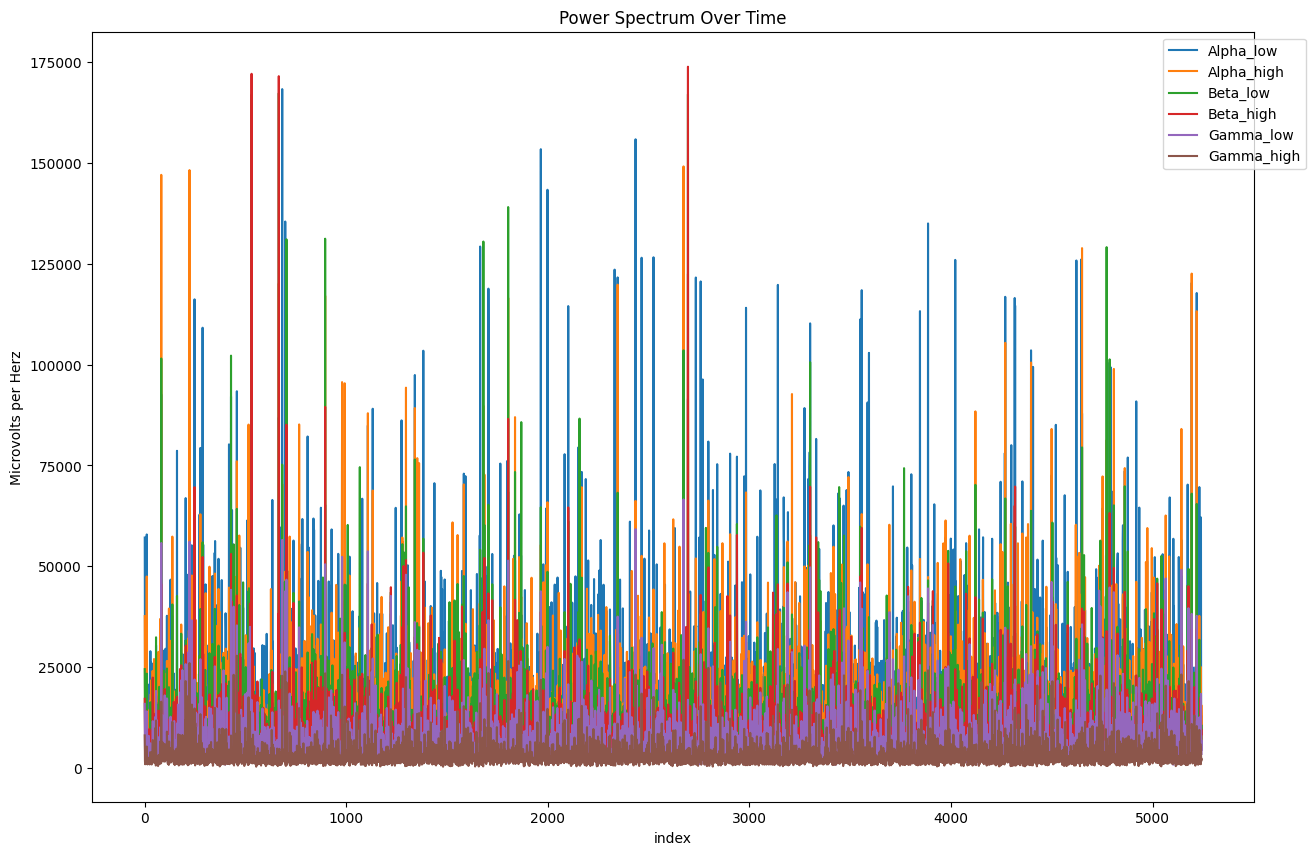

In [17]:
waves_columns = eeg_authentication.loc[:, 'Alpha_low':'Gamma_high']

line_plot(waves_columns,
          title='Power Spectrum Over Time',
          xlabel='index',
          ylabel='Microvolts per Herz')

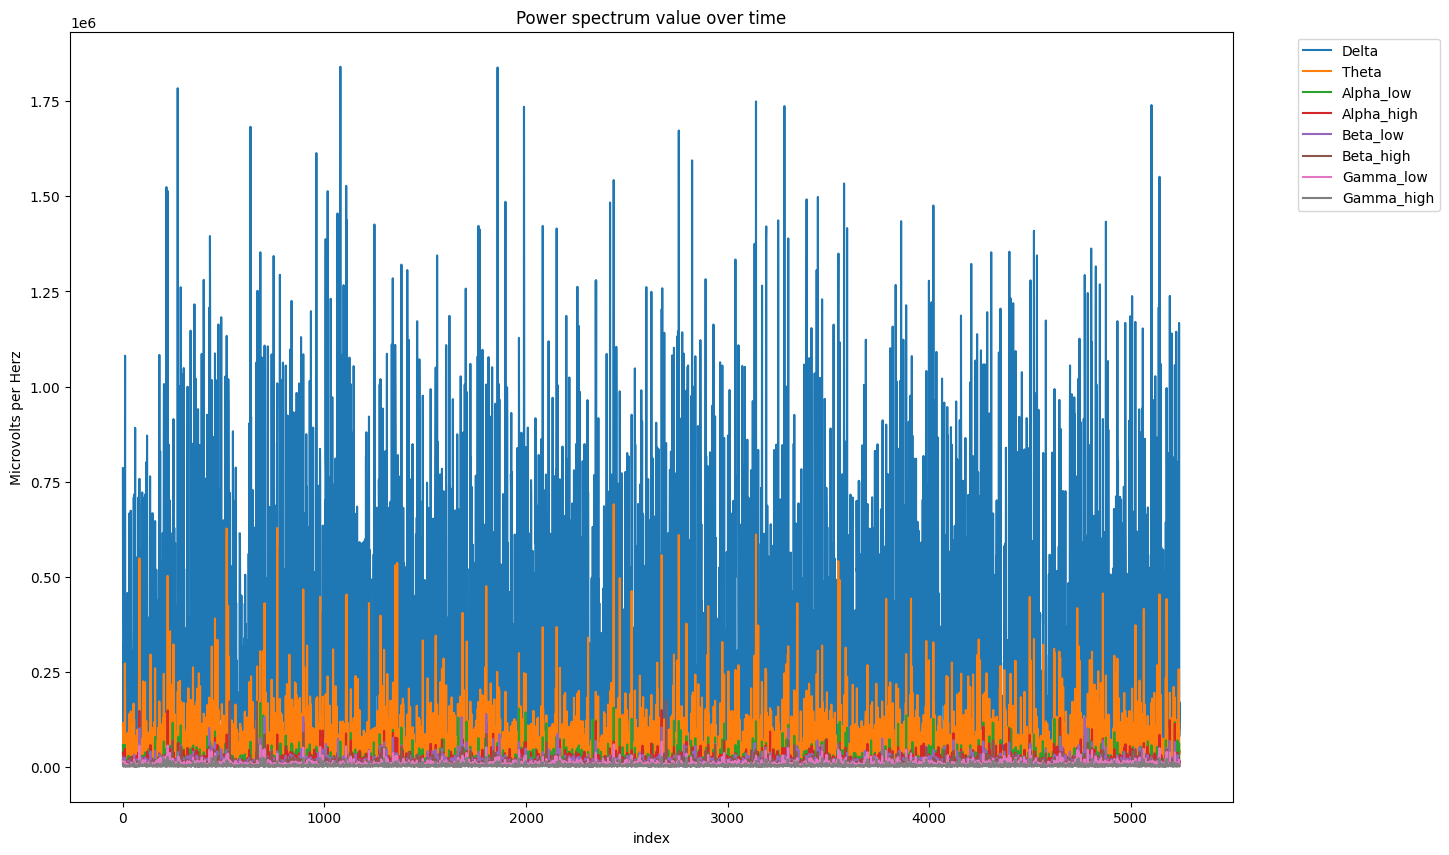

In [18]:
waves_columns = eeg_authentication.loc[:, 'Delta':'Gamma_high']

line_plot(waves_columns,
          title='Power spectrum value over time',
          xlabel='index',
          ylabel='Microvolts per Herz')

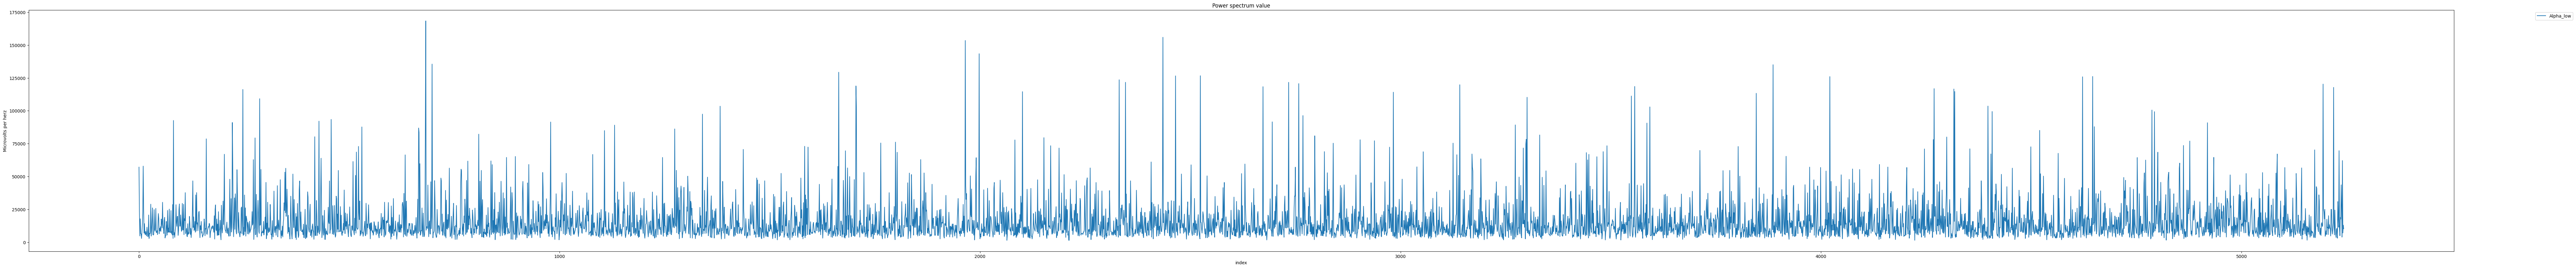

In [19]:
line_plot(["Alpha_low"],
          title='Power spectrum value',
          xlabel='index',
          ylabel='Microvolts per herz',
          figsize=(100, 10))

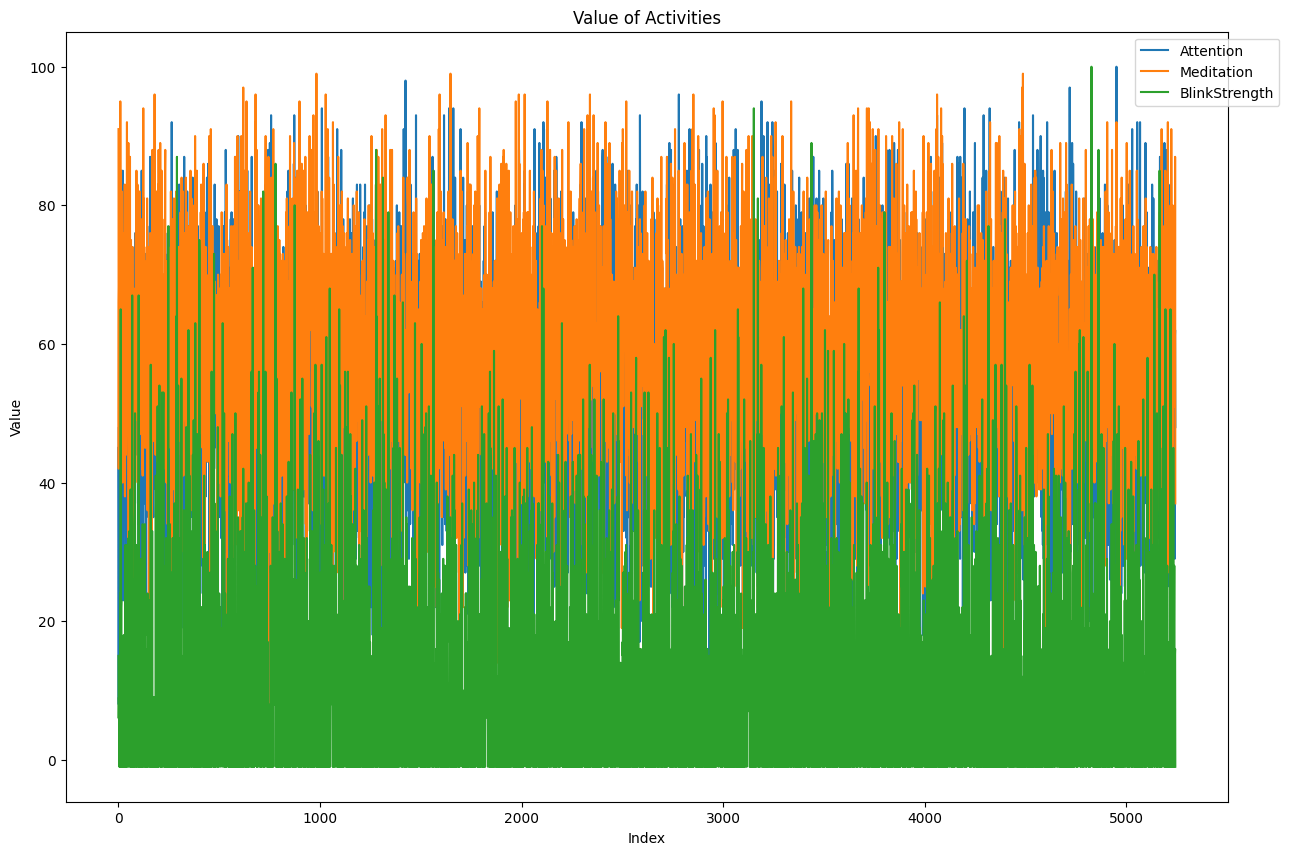

In [21]:
activities_columns = eeg_authentication.loc[:, 'Attention':'BlinkStrength']

line_plot(activities_columns, "Value of Activities", "Index", "Value")

### 2.1 Displaying line plots didn't give me much information. That's why now distribution will be checked

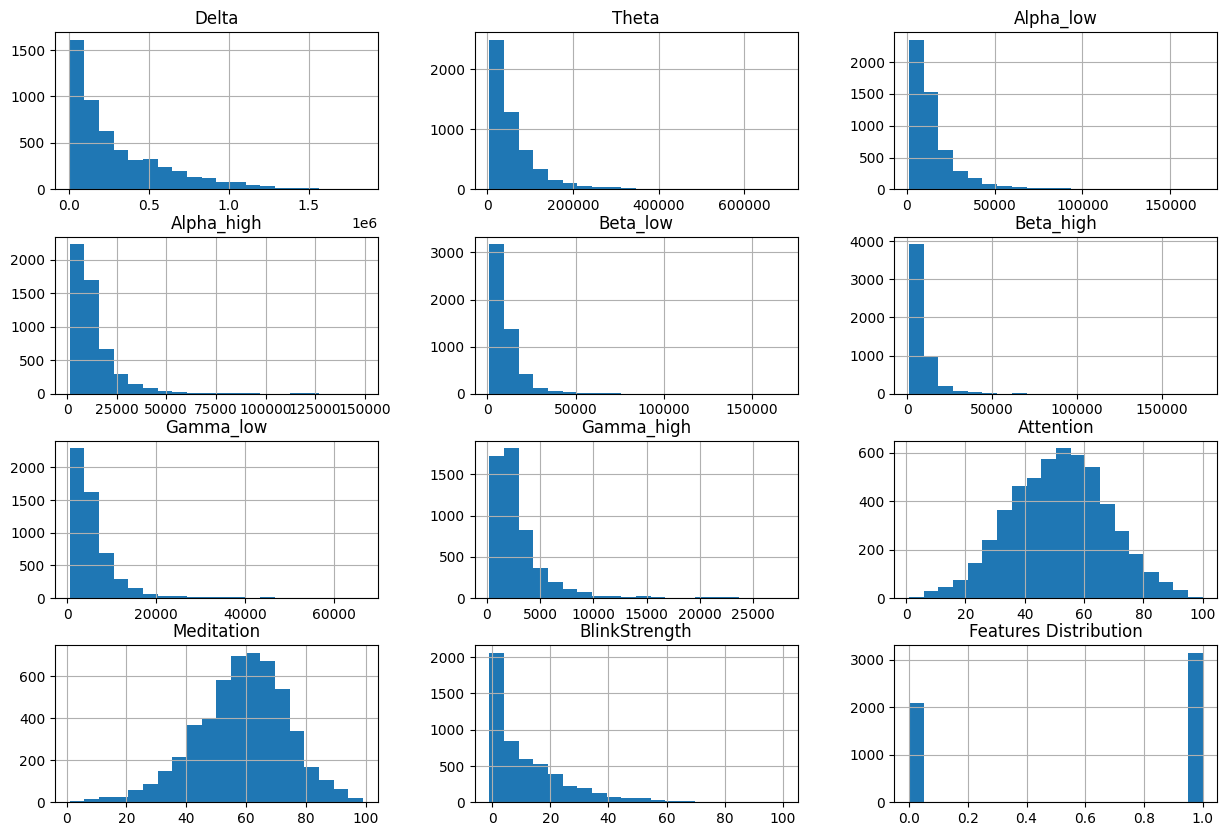

In [22]:
eeg_authentication.hist(figsize=(15,10), bins = 20)
plt.title("Features Distribution")
plt.show()

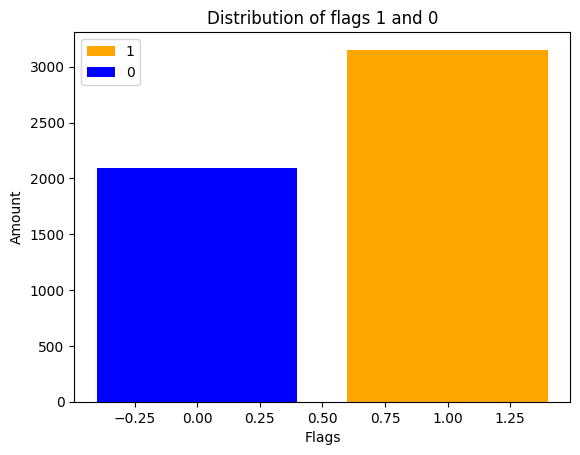

In [23]:
flags = [1, 0]
flag_amount = eeg_authentication["Flag"].value_counts()
plt.bar(flags, flag_amount, color=["orange", "blue"], label=["1", "0"])
plt.xlabel('Flags')
plt.ylabel('Amount')
plt.title('Distribution of flags 1 and 0')
plt.legend()
plt.show()

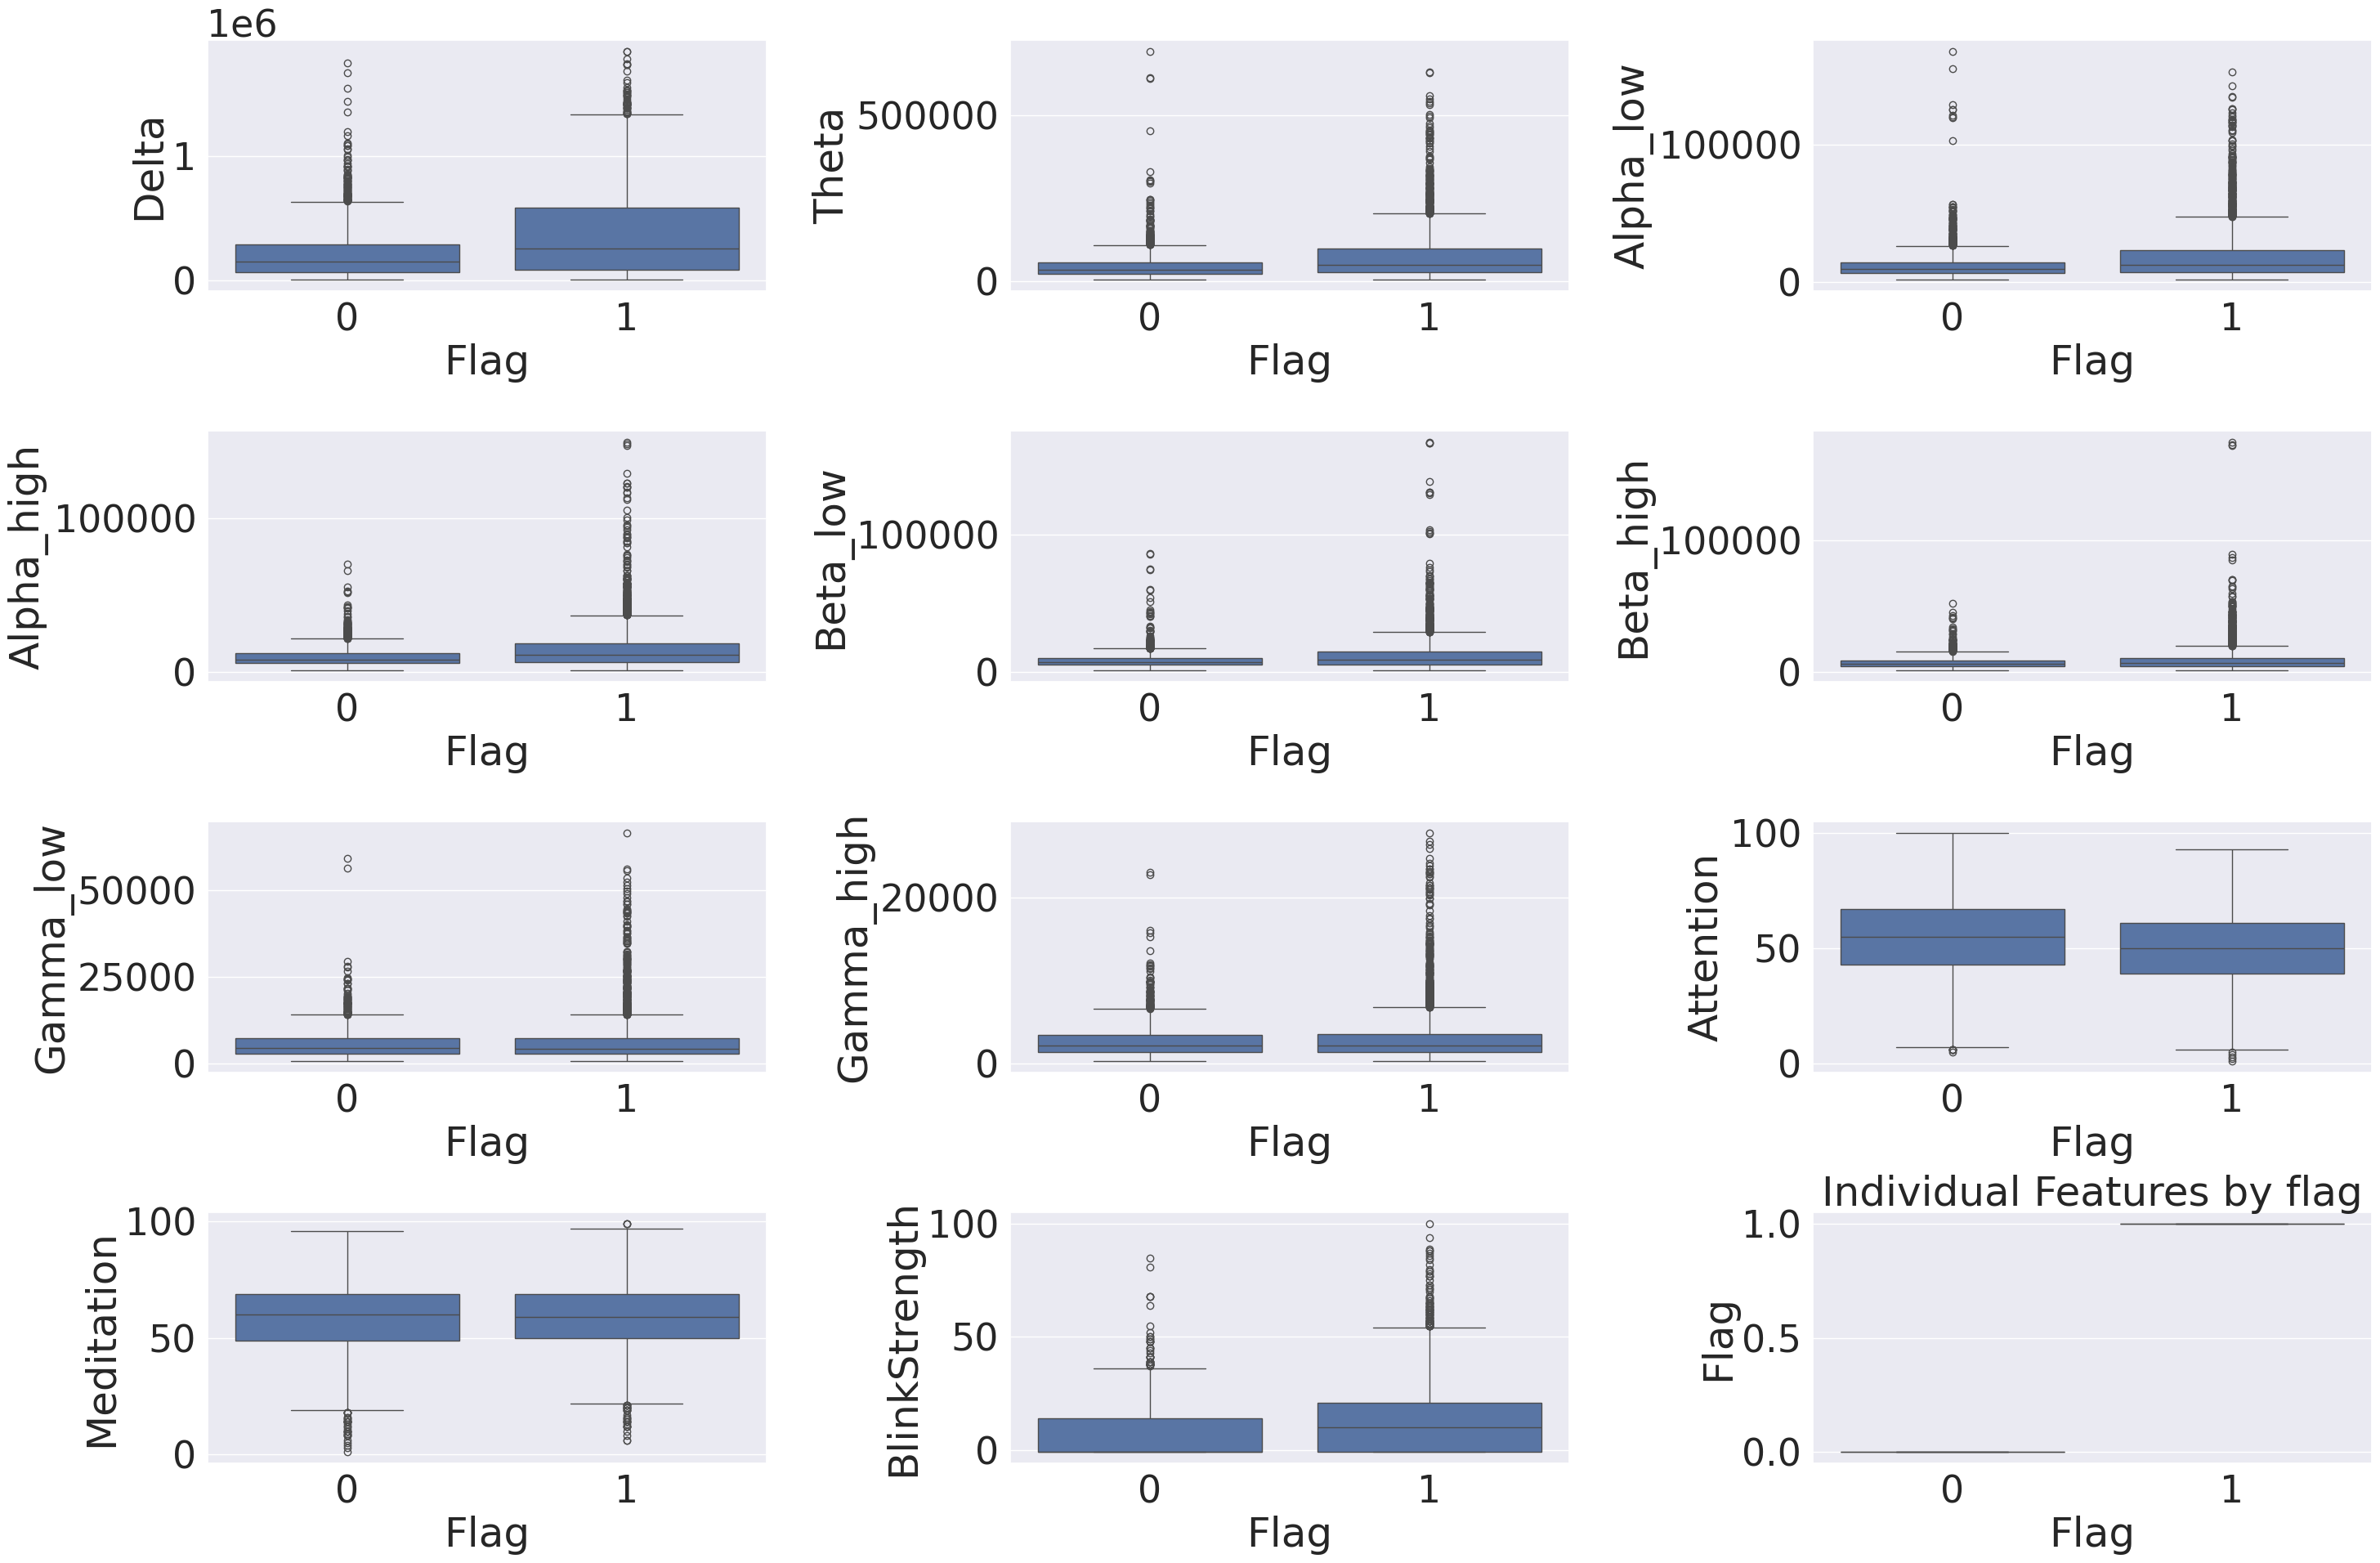

In [24]:
sns.set(font_scale=3)
fig,ax = plt.subplots(nrows = 4, ncols = 3, figsize=(30, 20))
row = 0
col = 0
for i in range(len(eeg_authentication.columns)):
    if col > 2:
        row += 1
        col = 0
    axes = ax[row,col]
    sns.boxplot(x = eeg_authentication["Flag"], y = eeg_authentication.iloc[:, i], ax = axes)
    col += 1
plt.tight_layout()
plt.title("Individual Features by flag")
plt.show()

<Figure size 1600x1280 with 0 Axes>

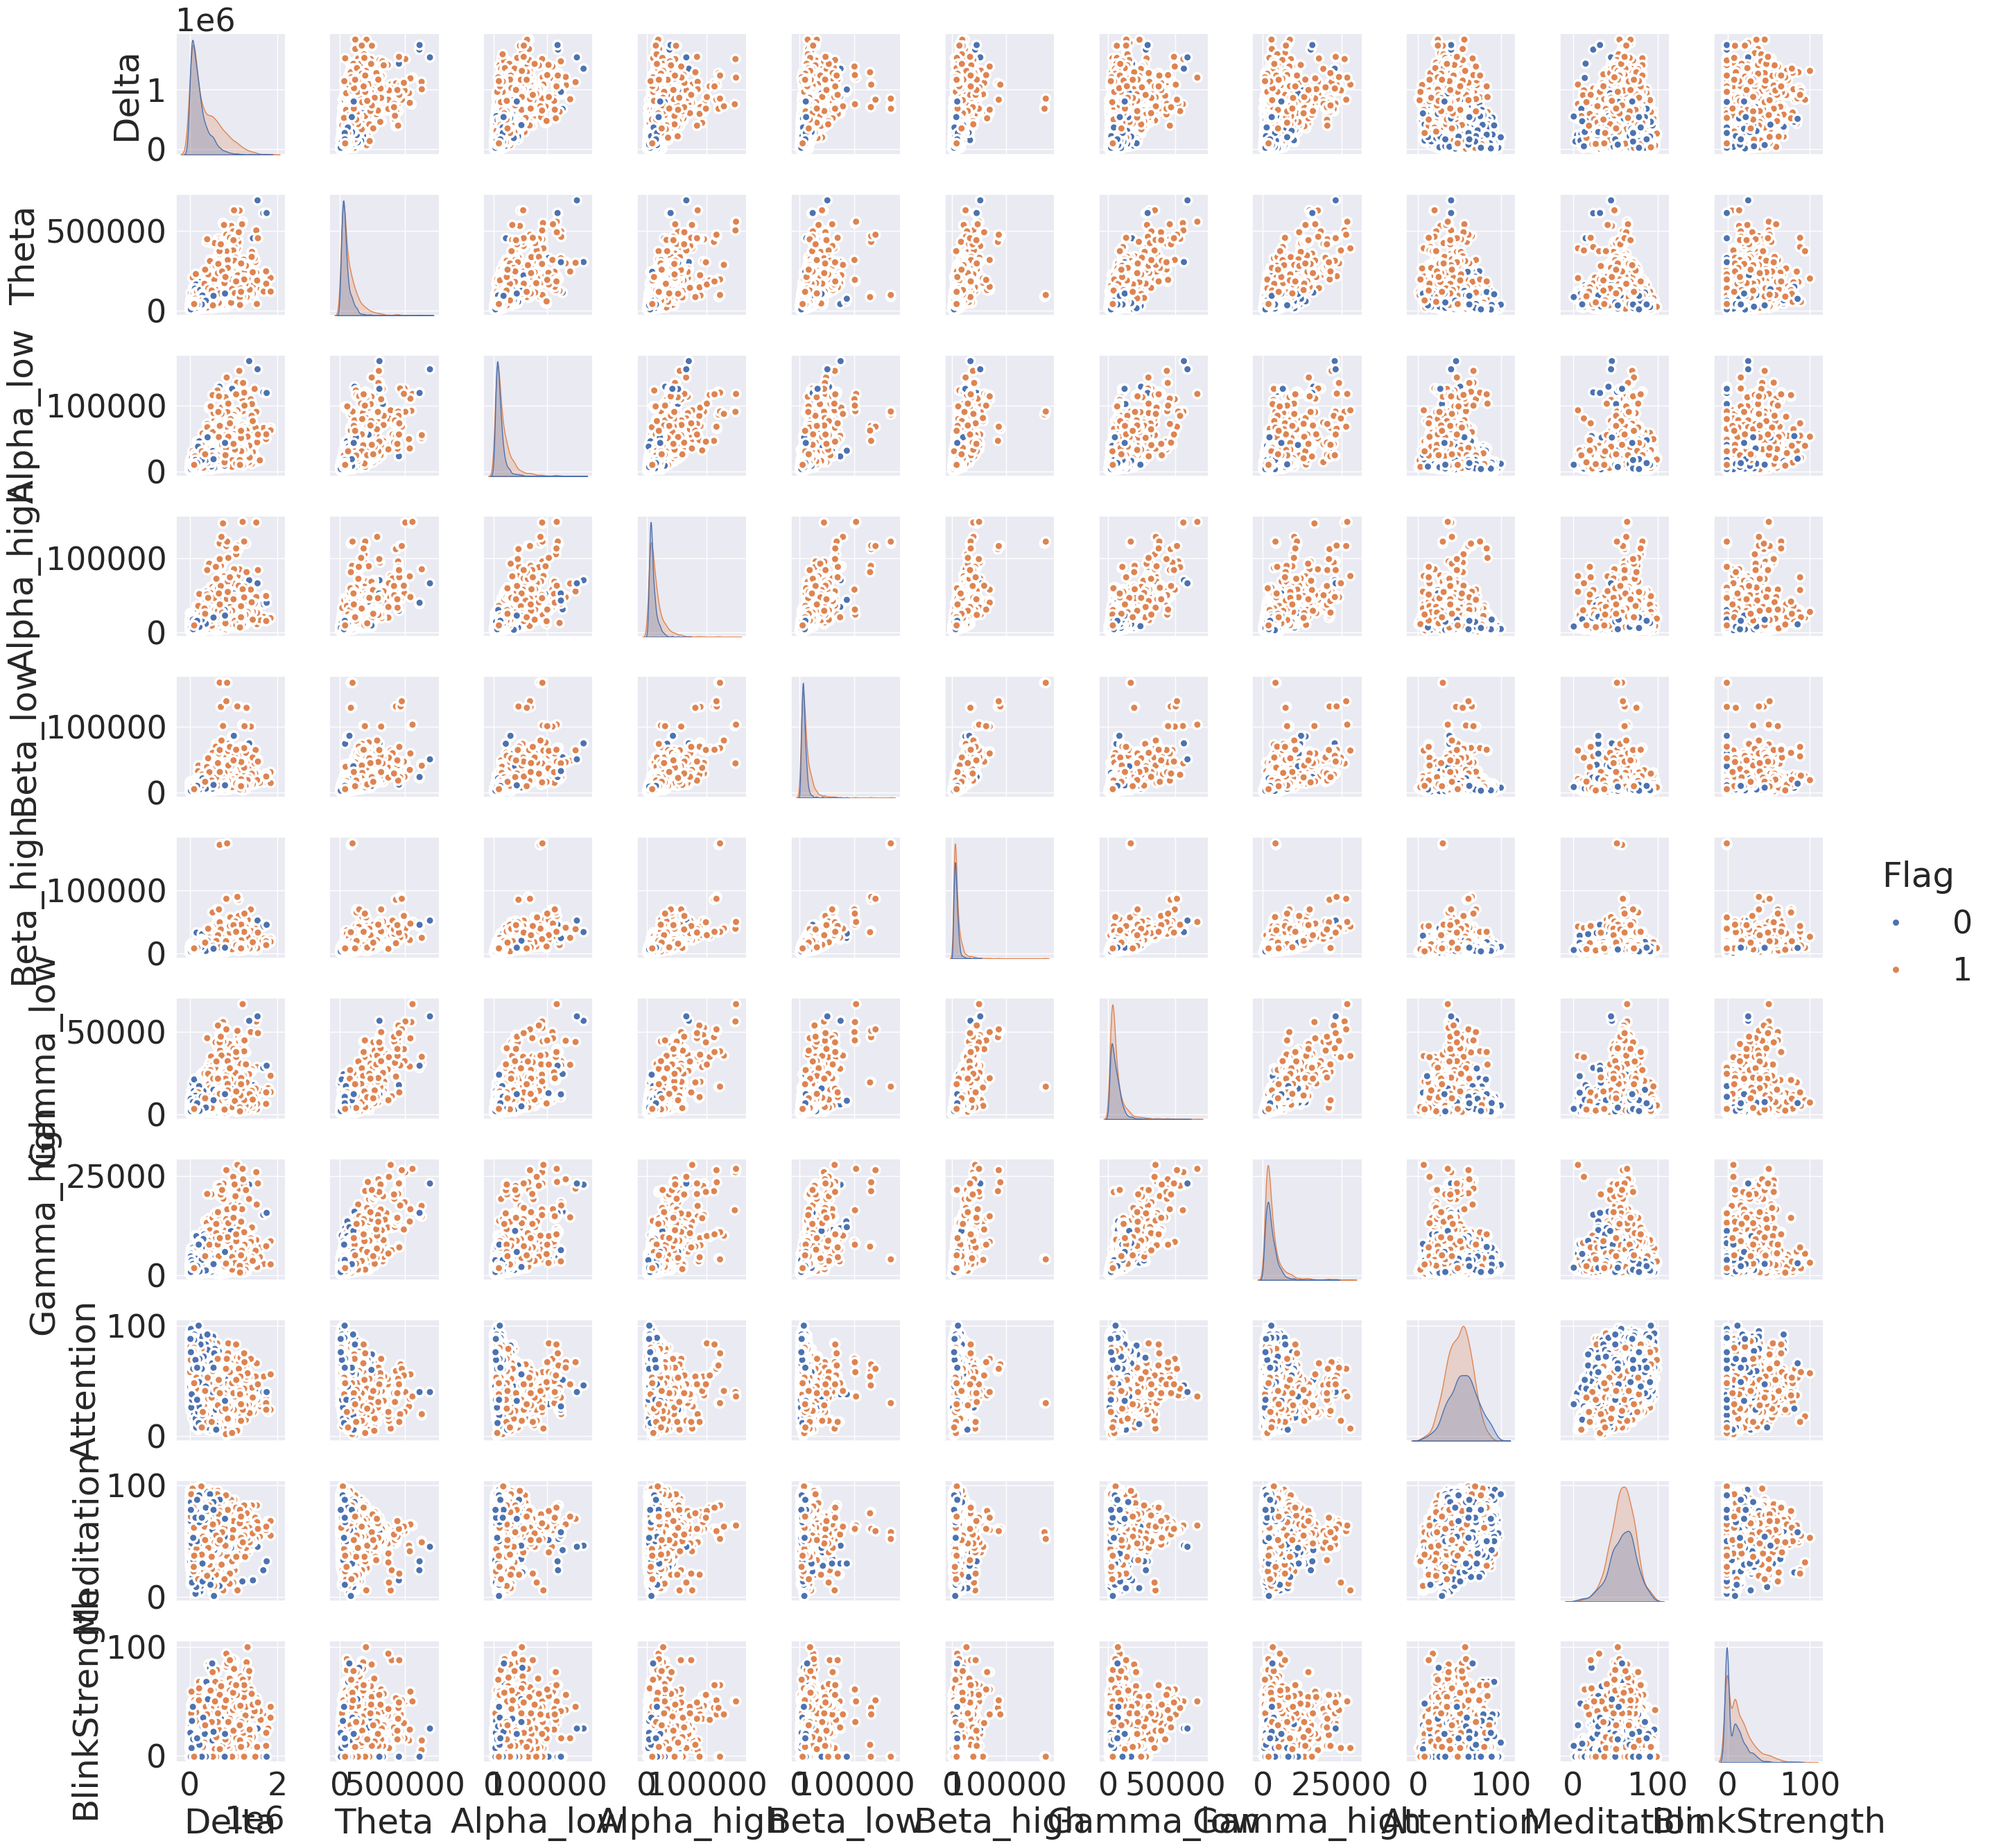

In [25]:
plt.figure(figsize=(20,16), dpi= 80)
sns.pairplot(eeg_authentication.loc[:, ["Flag", 'Delta', 'Theta', 'Alpha_low', 'Alpha_high', 'Beta_low', 'Beta_high',
       'Gamma_low', 'Gamma_high', 'Attention', 'Meditation', 'BlinkStrength']],
             kind="scatter", hue="Flag", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()

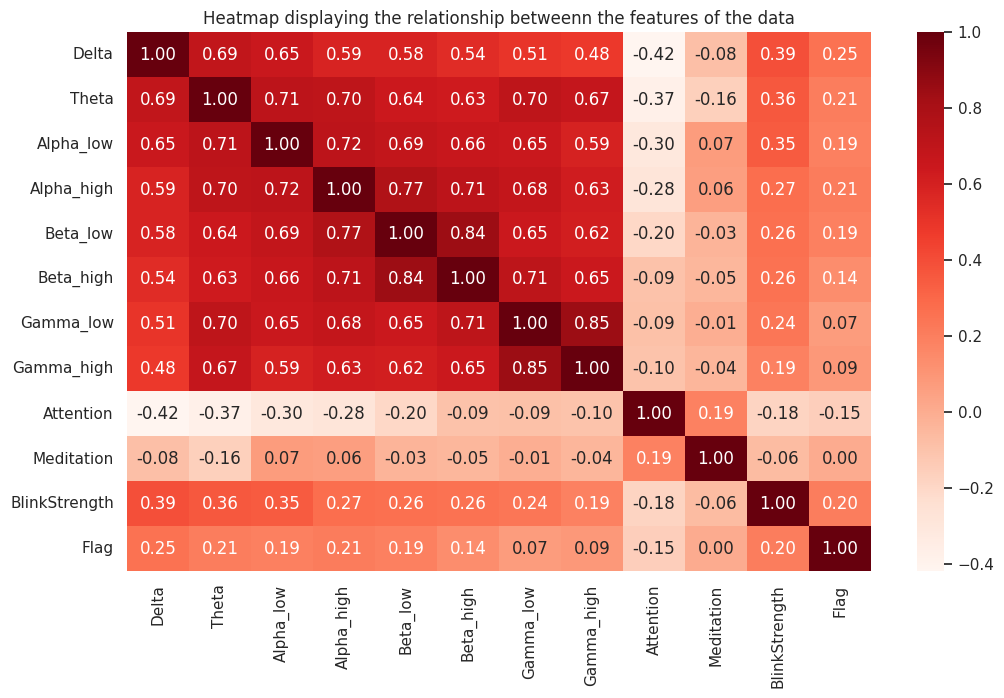

In [33]:
plt.figure(figsize=(12,7))
sns.heatmap(eeg_authentication.corr(),cmap=plt.cm.Reds,annot=True,fmt='.2f')
sns.set(font_scale=1)
plt.title('Heatmap displaying the relationship betweenn the features of the data')
plt.show()